In [78]:
import numpy as np
import tensorflow as tf
import scipy as sci
import numba as nb
from numba import jit,njit
import matplotlib.pyplot as plt
import matplotlib.colors as colors



""" 
This file is meant to generate normalized figures based on the Multibrot sequences z_(n+1)=z^p+c. 

The output is a set of 64x64 pictures of pieces of the Multibrot set where the output values are normalized.


"""

' \nThis file is meant to generate normalized figures based on the Multibrot sequences z_(n+1)=z^p+c. \n\nThe output is a set of 64x64 pictures of pieces of the Multibrot set where the output values are normalized.\n\n\n'

In [79]:

class HistogramNormalize(colors.Normalize):
    def __init__(self, data, vmin=None, vmax=None):
        if vmin is not None:
            data = data[data > vmin]
        if vmax is not None:
            data = data[data < vmax]
            
        sorted_data = np.sort(data.flatten())
        self.sorted_data = sorted_data[np.isfinite(sorted_data)]
        colors.Normalize.__init__(self, vmin, vmax)

    def __call__(self, value, clip=None):
        return np.ma.masked_array(np.searchsorted(self.sorted_data, value) /
                                  len(self.sorted_data))

In [80]:
def fractals(p,c):
    z=0
    for i in range(100):
        z=z**p+c
    z[np.where(np.isnan(z)==True)]=0
    return z


In [127]:
def Rand_pic():
    c_maps=['jet','viridis','plasma','inferno','magma','cividis','rainbow','nipy_spectral','brg']
    c=np.random.randint(0,len(c_maps))
    
    std=0
    
    while std<1e4:
        p=int(np.random.uniform(2,8))
        x0=np.random.uniform(-2,0.5)
        y0=np.random.uniform(-2,2)
        d_0=np.random.uniform(0,0.75)
    
        x_v=np.linspace(x0,x0+d_0,num=600)
        y_v=np.linspace(y0,y0+d_0,num=600)
    
        z_v=np.abs(np.array([fractals(p,x_v+1j*y_v[i]) for i in range(len(y_v))]))
        
        std=np.std(z_v)
    #print(std)
    normalizer = HistogramNormalize(np.tanh(z_v))
    fig,ax=plt.subplots()
    im=ax.imshow(np.tanh(z_v),cmap=c_maps[c],norm=normalizer)#1/(np.exp(z_v/np.max(z_v))+1)
    ax.axis('off')
    
    #fig.colorbar(im)
    #plt.show()

    return fig

/tmp/ipykernel_933/627304233.py:4: RuntimeWarning: overflow encountered in square
  z=z**p+c
/tmp/ipykernel_933/627304233.py:4: RuntimeWarning: invalid value encountered in square
  z=z**p+c
/tmp/ipykernel_933/627304233.py:4: RuntimeWarning: overflow encountered in power
  z=z**p+c
/tmp/ipykernel_933/627304233.py:4: RuntimeWarning: invalid value encountered in power
  z=z**p+c


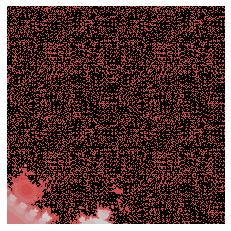

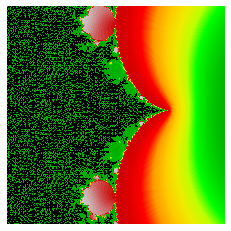

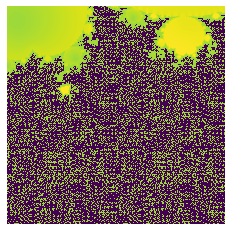

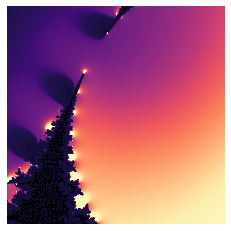

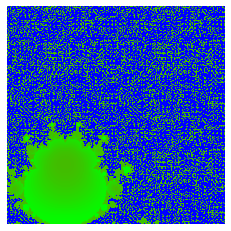

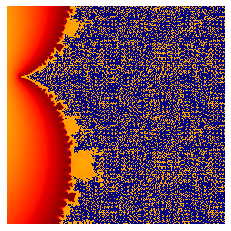

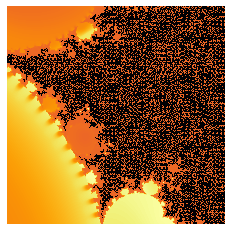

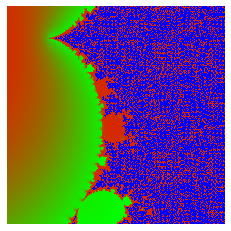

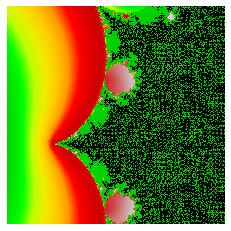

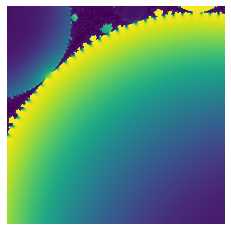

In [130]:
for i in range(10):
    Rand_pic().show()


/tmp/ipykernel_933/627304233.py:4: RuntimeWarning: overflow encountered in square
  z=z**p+c
/tmp/ipykernel_933/627304233.py:4: RuntimeWarning: invalid value encountered in square
  z=z**p+c
/tmp/ipykernel_933/627304233.py:4: RuntimeWarning: overflow encountered in power
  z=z**p+c
/tmp/ipykernel_933/627304233.py:4: RuntimeWarning: invalid value encountered in power
  z=z**p+c


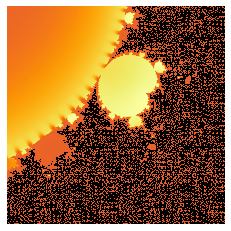

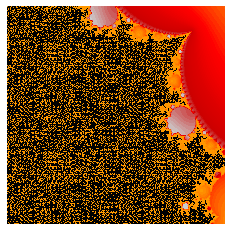

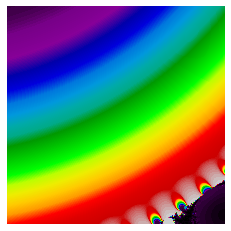

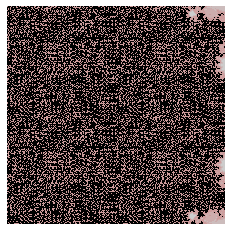

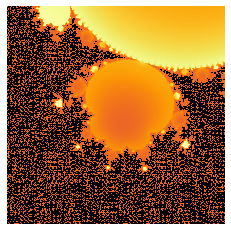

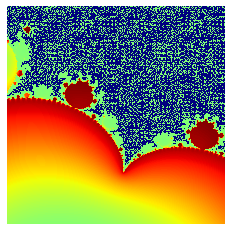

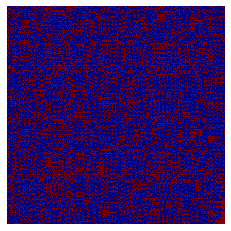

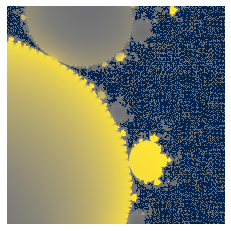

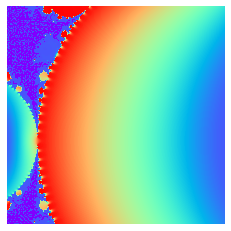

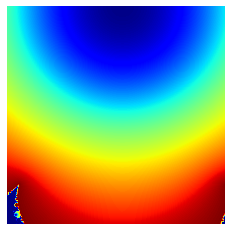

In [109]:
for i in range(10):
    Rand_pic().savefig(r"TPics/fig_{}.png".format(i),dpi=100,format='png')